In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 


        

In [17]:
def ploteo_complejo(mat,indicador,escalas):
    
    if(indicador=="I"):
        mat=np.abs(mat)**2
    elif(indicador=="A"):
        mat=np.abs(mat)
    elif(indicador=="p"):
        mat=np.angle(mat)
        
    if(escalas==1):
        plt.gray()
        plt.figure()
        plt.imshow(mat)
        plt.show()
        
   
    else:
        plt.figure()
        plt.imshow(np.log(mat+0.00001))
        plt.show()
    
    return 0

In [5]:
np.shape(cv2.imread('biblioteca.png',0))


(768, 768)

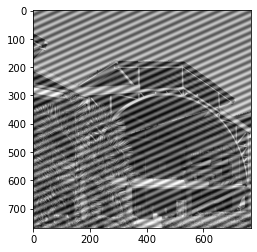

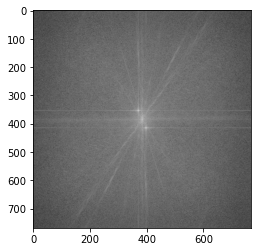

0

In [18]:

img=cv2.imread('biblioteca.png',cv2.IMREAD_UNCHANGED)
fft_img=np.fft.fftn(img)
fft_img=np.fft.fftshift(fft_img)


plt.figure()
plt.imshow(img)
plt.show()


ploteo_complejo(fft_img,"I",0)



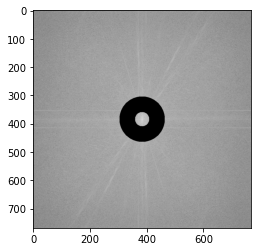

<Figure size 432x288 with 0 Axes>

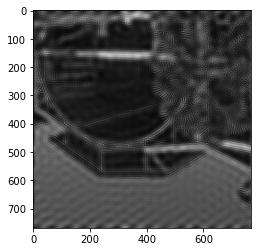

0

In [24]:
x = np.arange(-768/2,768/2, 1)
y = np.arange(-768/2,768/2, 1)
xx, yy = np.meshgrid(x, y)

disco1=np.array(xx**2+yy**2<=25**2,dtype=bool)
disco1=disco1*1
disco2=np.array(xx**2+yy**2>=80**2,dtype=bool)
disco2=disco2*1
anillo=np.add(disco2,disco1)

nuevaimagen=(fft_img)*anillo
ploteo_complejo(nuevaimagen,"I",0)

nuevaimagen=np.fft.fftn(fft_img*anillo)
ploteo_complejo(nuevaimagen,"I",1)




In [20]:
imagen2= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(imagen2.shape)
plt.imshow(imagen2,cmap='gray')

error: OpenCV(4.5.4-dev) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x0e9d99ad::Set<1,-1,-1>,struct cv::impl::A0x0e9d99ad::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
mask = np.zeros((768,768),dtype="uint8")
cv2.rectangle(mask,(50,150),(500,500),10,-1)
plt.figure()
plt.imshow(mask)
plt.show()

384


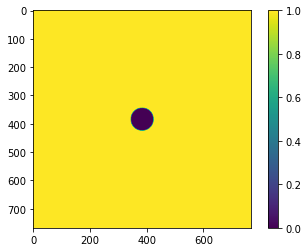

In [45]:
mask2 = np.ones(np.shape(img),dtype="uint8")
coordx=int(np.shape(img)[0]/2)
coordy=int(np.shape(img)[0]/2)

print(coord)

cv2.circle(mask2,(coordx,coordy),40,0,-1)
plt.figure()
plt.imshow(mask2)
plt.colorbar()
plt.show()

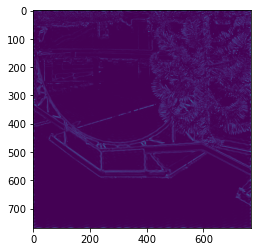

0

In [47]:
new_img=np.fft.fftn(mask2*fft_img);
ploteo_complejo(new_img,"I",1)

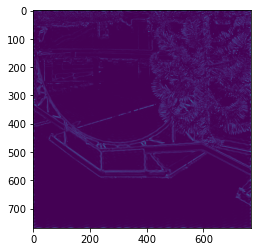

In [48]:
plt.figure()
plt.imshow(np.abs(new_img)**2)
plt.show()